In [ ]:
!python main.py

In [ ]:
from model import *
from src.problem.prb import Analytic

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
an = Analytic(device)

act_func=lambda x: torch.tanh(x)

V_NN = V_Net(dim=1, ns=128, act_func=act_func, hh=0.5,
                            device=device, psi_func=an.psi_func, TT=1).to(device)

V_NN.load_state_dict(torch.load('V_NN_1d.pth'))



<All keys matched successfully>

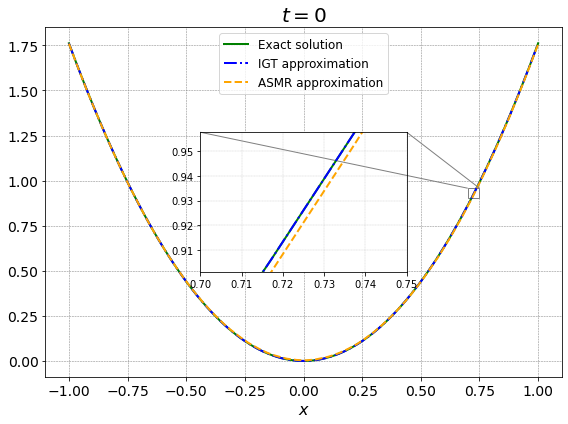

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import numpy as np
import torch

# Load approximations
V_ASMR0 = np.load('V_ASMR_t=0.npz')['v']

# Setup input
num_points = 100
x = torch.linspace(-1, 1, num_points, device=device).unsqueeze(1)
t = torch.zeros_like(x)

# Predict with model
with torch.no_grad():
    V_NN.eval()
    IGT = V_NN(t, x)
    v_exact = an.V_exact(x, t=0.)

# Errors
err_IGT_0 = 1.9480
err_ASMR_0 = 3.657005


# Convert tensors to numpy
x_np = x.cpu().numpy().squeeze()
v_exact_np = v_exact.cpu().numpy().squeeze()
IGT_np = IGT.cpu().numpy().squeeze()
V_ASMR0_np = V_ASMR0.squeeze()

# Main plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x_np, v_exact_np, color='green', linestyle='-', linewidth=2, label='Exact solution')
ax.plot(x_np, IGT_np, color='blue', linestyle='-.', linewidth=2, label='IGT approximation')
ax.plot(x_np, V_ASMR0_np, color='orange', linestyle='--', linewidth=2, label='ASMR approximation')


# Axis labels and style
ax.set_title(r'$t=0$', fontsize=20)
ax.set_xlabel(r'$x$', fontsize=16)
#ax.set_ylabel(r'$v(x)$', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)

# Create zoom inset on [0.7, 0.75]
axins = inset_axes(ax, width="40%", height="40%", loc="center")
axins.plot(x_np, v_exact_np, color='green', linestyle='-', linewidth=2)
axins.plot(x_np, IGT_np, color='blue', linestyle='-.', linewidth=2)
axins.plot(x_np, V_ASMR0_np, color='orange', linestyle='--', linewidth=2)
# axins.plot(x_np, V_NNA0_np, color='red', linestyle=':', linewidth=2)

# Zoom bounds
x1, x2 = 0.7, 0.75
axins.set_xlim(x1, x2)

# Compute y-limits for zoom
idx_zoom = np.logical_and(x_np >= x1, x_np <= x2)
y_min = min(v_exact_np[idx_zoom].min(), IGT_np[idx_zoom].min(), V_ASMR0_np[idx_zoom].min())
y_max = max(v_exact_np[idx_zoom].max(), IGT_np[idx_zoom].max(), V_ASMR0_np[idx_zoom].max())
axins.set_ylim(y_min, y_max)

# Zoom style
axins.tick_params(axis='both', labelsize=10)
axins.grid(True, linestyle='--', linewidth=0.3)
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="gray", lw=1.)

# Save and show
plt.tight_layout()
plt.savefig('v0_zoomed.png', dpi=300)
plt.show()


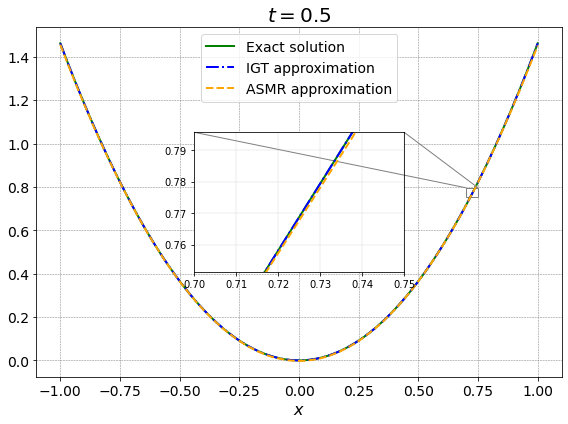

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import torch

# Setup input
num_points = 100
t = 0.5 * torch.ones(num_points, 1, device=device)
x = torch.linspace(-1, 1, num_points, device=device).unsqueeze(1)

# Load data
V_ASMR05 = np.load('V_ASMR_t=0,5.npz')['v']

# Convert errors (not shown here, but still useful for later)
err_IGT_05 = 3.7149
err_ASMR_05 = 3.783259305131779

# Evaluate exact and predicted
with torch.no_grad():
    V_NN.eval()
    IGT = V_NN(t, x)
    v_exact = an.V_exact(x, t=0.5)

# Convert to numpy
x_np = x.cpu().numpy().squeeze()
v_exact_np = v_exact.cpu().numpy().squeeze()
IGT_np = IGT.cpu().numpy().squeeze()
V_ASMR05_np = V_ASMR05.squeeze()


# Main plot
fig, ax = plt.subplots(figsize=(8, 6))

# Main curves
ax.plot(x_np, v_exact_np, color='green', linestyle='-', linewidth=2, label='Exact solution')
ax.plot(x_np, IGT_np, color='blue', linestyle='-.', linewidth=2, label='IGT approximation')
ax.plot(x_np, V_ASMR05_np, color='orange', linestyle='--', linewidth=2, label='ASMR approximation')


# Axis labels and title
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_title(r'$t=0.5$', fontsize=20)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax.legend(fontsize=14, loc='best')

# Create zoom inset centered in plot
axins = inset_axes(ax, width="40%", height="40%", loc="center")
axins.plot(x_np, v_exact_np, color='green', linestyle='-', linewidth=2)
axins.plot(x_np, IGT_np, color='blue', linestyle='-.', linewidth=2)
axins.plot(x_np, V_ASMR05_np, color='orange', linestyle='--', linewidth=2)


# Zoom bounds
x1, x2 = 0.7, 0.75
axins.set_xlim(x1, x2)

# Y-axis auto adjustment
idx_zoom = np.logical_and(x_np >= x1, x_np <= x2)
y_min = min(v_exact_np[idx_zoom].min(), IGT_np[idx_zoom].min(),
            V_ASMR05_np[idx_zoom].min(), V_NNA05_np[idx_zoom].min())
y_max = max(v_exact_np[idx_zoom].max(), IGT_np[idx_zoom].max(),
            V_ASMR05_np[idx_zoom].max(), V_NNA05_np[idx_zoom].max())
axins.set_ylim(y_min, y_max)

# Zoom inset style
axins.tick_params(axis='both', labelsize=10)
axins.grid(True, linestyle='--', linewidth=0.3)
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="gray", lw=1.)
# Final layout and save
plt.tight_layout()
plt.savefig('v1_zoomed.png', dpi=300)
plt.show()


NameError: name 'mark_inset' is not defined

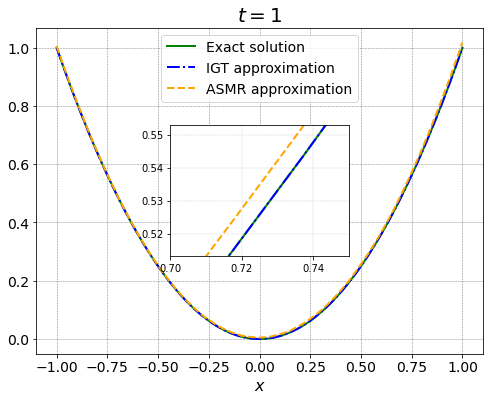

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import torch

# Setup input
num_points = 100
t = torch.ones(num_points, 1, device=device)
x = torch.linspace(-1, 1, num_points, device=device).unsqueeze(1)

# Load approximations
V_ASMR1 = np.load('V_ASMR_t=1.npz')['v']

# Errors (unused here)
err_IGT_1 = 0.000
err_ASMR_1 = 3.783259305131779
err_NNA_1 = 3.1702546402812004

# Predict
with torch.no_grad():
    V_NN.eval()
    IGT = V_NN(t, x)
    v_exact = an.V_exact(x, t=1.0)

# Convert to NumPy
x_np = x.cpu().numpy().squeeze()
v_exact_np = v_exact.cpu().numpy().squeeze()
IGT_np = IGT.cpu().numpy().squeeze()
V_ASMR1_np = V_ASMR1.squeeze()


# Main plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x_np, v_exact_np, color='green', linestyle='-', linewidth=2, label='Exact solution')
ax.plot(x_np, IGT_np, color='blue', linestyle='-.', linewidth=2, label='IGT approximation')
ax.plot(x_np, V_ASMR1_np, color='orange', linestyle='--', linewidth=2, label='ASMR approximation')


# Labels and layout
ax.set_xlabel(r'$x$', fontsize=16)
#ax.set_ylabel(r'$v(x)$', fontsize=16)
ax.set_title(r'$t=1$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax.legend(fontsize=14, loc='best')

# Inset zoom: center view on x in [0.7, 0.75]
axins = inset_axes(ax, width="40%", height="40%", loc="center")
axins.plot(x_np, v_exact_np, color='green', linestyle='-', linewidth=2)
axins.plot(x_np, IGT_np, color='blue', linestyle='-.', linewidth=2)
axins.plot(x_np, V_ASMR1_np, color='orange', linestyle='--', linewidth=2)

# Zoom region
x1, x2 = 0.7, 0.75
axins.set_xlim(x1, x2)

idx_zoom = np.logical_and(x_np >= x1, x_np <= x2)
y_min = min(v_exact_np[idx_zoom].min(), IGT_np[idx_zoom].min(),
            V_ASMR1_np[idx_zoom].min(), V_NNA1_np[idx_zoom].min())
y_max = max(v_exact_np[idx_zoom].max(), IGT_np[idx_zoom].max(),
            V_ASMR1_np[idx_zoom].max(), V_NNA1_np[idx_zoom].max())
axins.set_ylim(y_min, y_max)

axins.tick_params(axis='both', labelsize=10)
axins.grid(True, linestyle='--', linewidth=0.3)
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="gray", lw=1.)
# Save and display
plt.tight_layout()
plt.savefig('v2_zoomed.png', dpi=300)
plt.show()


<ipython-input-4-8c3365713ec4>:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(itr, Loss_v, '-o', label=r'$\mathrm{Loss}_V$', linestyle='-.', linewidth=2, markersize=5)
<ipython-input-4-8c3365713ec4>:33: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-s" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(itr, Loss_v_x, '-s', label=r'$\mathrm{Loss}_{\nabla_{\mathbf{x}} V}$', linestyle='--', linewidth=2, markersize=5)
<ipython-input-4-8c3365713ec4>:34: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-^" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(itr, Loss_hjb, '-^', label=r'$\mathrm{Loss}_{\mathrm{HJB}}$', linestyle=':', linewidth=2, markersize=5)


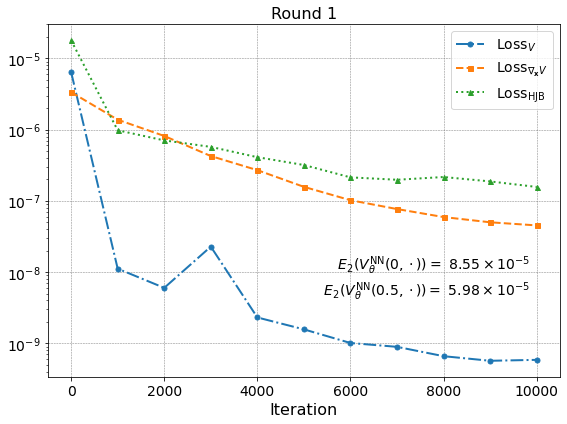

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import torch

# Round 1

# Iterations and loss values for each round
itr = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

Loss_v = [
    6.4128e-06, 1.1171e-08, 6.0131e-09, 2.2801e-08, 2.3091e-09, 1.5716e-09,
    1.0114e-09, 8.9338e-10, 6.6052e-10, 5.6929e-10, 5.8665e-10
]
Loss_v_x = [
    3.3625e-06, 1.3800e-06, 8.1565e-07, 4.2634e-07, 2.7017e-07, 1.5747e-07,
    1.0222e-07, 7.6832e-08, 5.9311e-08, 5.0078e-08, 4.5279e-08
]
Loss_hjb = [
    1.7904e-05, 9.8014e-07, 7.0645e-07, 5.7340e-07, 4.1082e-07, 3.1909e-07,
    2.1397e-07, 1.9803e-07, 2.1640e-07, 1.8771e-07, 1.5699e-07
]

err_r1_t0 = 8.55
err_r1_t05 = 5.98
err_r1_t1 = 0.00



plt.figure(figsize=(8, 6))  # Larger figure for clarity

# Plot losses with clear markers and labels
plt.plot(itr, Loss_v, '-o', label=r'$\mathrm{Loss}_V$', linestyle='-.', linewidth=2, markersize=5)
plt.plot(itr, Loss_v_x, '-s', label=r'$\mathrm{Loss}_{\nabla_{\mathbf{x}} V}$', linestyle='--', linewidth=2, markersize=5)
plt.plot(itr, Loss_hjb, '-^', label=r'$\mathrm{Loss}_{\mathrm{HJB}}$', linestyle=':', linewidth=2, markersize=5)

# Annotate relative errors using LaTeX formatting
error_text = (
    r'$\quad\quad\quad\quadE_2(V^{\mathrm{NN}}_{\theta}(0, \cdot)) =\ ' + f'{err_r1_t0:.2f}' + r'\times 10^{-5}$' + '\n' +
    r'$\quad\quad\quadE_2(V^{\mathrm{NN}}_{\theta}(0.5, \cdot)) =\ ' + f'{err_r1_t05:.2f}' + r'\times 10^{-5}$'
)

plt.text(0.7, 0.28, error_text, fontsize=14, ha='center', va='center',
         transform=plt.gca().transAxes)

# Axis labels and title
plt.xlabel('Iteration', fontsize=16)
#plt.ylabel('Loss', fontsize=16)
plt.title('Round 1', fontsize=16)

# Log scale for loss
plt.yscale("log")

# Larger tick labels
plt.tick_params(axis='both', which='major', labelsize=14)

# Legend and grid
plt.legend(fontsize=14)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Layout and save
plt.tight_layout()
plt.savefig('loss1.png', dpi=300)
plt.show()

<ipython-input-6-9a4c12cb9096>:27: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(itr, Loss_v, '-o', label=r'$\mathrm{Loss}_V$', linestyle='-.', linewidth=2, markersize=5)
<ipython-input-6-9a4c12cb9096>:28: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-s" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(itr, Loss_v_x, '-s', label=r'$\mathrm{Loss}_{\nabla_{\mathbf{x}} V}$', linestyle='--', linewidth=2, markersize=5)
<ipython-input-6-9a4c12cb9096>:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-^" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(itr, Loss_hjb, '-^', label=r'$\mathrm{Loss}_{\mathrm{HJB}}$', linestyle=':', linewidth=2, markersize=5)


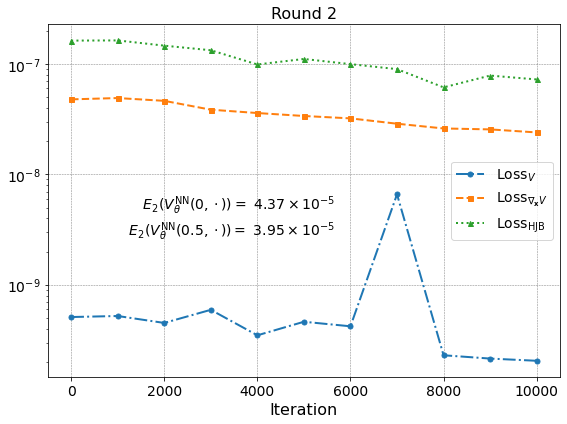

In [ ]:
# Round 2

# Iterations and loss values for each round
itr = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

Loss_v = [
    5.1185e-10, 5.2289e-10, 4.5255e-10, 5.9495e-10, 3.4962e-10, 4.6381e-10,
    4.2196e-10, 6.6024e-09, 2.3071e-10, 2.1532e-10, 2.0565e-10
]
Loss_v_x = [
    4.7789e-08, 4.9118e-08, 4.6337e-08, 3.8536e-08, 3.5934e-08, 3.3798e-08,
    3.2153e-08, 2.8769e-08, 2.6063e-08, 2.5555e-08, 2.3987e-08
]
Loss_hjb = [
    1.6262e-07, 1.6325e-07, 1.4634e-07, 1.3301e-07, 9.8894e-08, 1.1090e-07,
    9.9577e-08, 8.9741e-08, 6.1353e-08, 7.8454e-08, 7.2372e-08
]

err_r1_t0 = 4.3701
err_r1_t05 = 3.9483
err_r1_t1 = 0.000


plt.figure(figsize=(8, 6))  # Larger figure for clarity

# Plot losses with distinct markers and line styles
plt.plot(itr, Loss_v, '-o', label=r'$\mathrm{Loss}_V$', linestyle='-.', linewidth=2, markersize=5)
plt.plot(itr, Loss_v_x, '-s', label=r'$\mathrm{Loss}_{\nabla_{\mathbf{x}} V}$', linestyle='--', linewidth=2, markersize=5)
plt.plot(itr, Loss_hjb, '-^', label=r'$\mathrm{Loss}_{\mathrm{HJB}}$', linestyle=':', linewidth=2, markersize=5)

# Annotate relative errors
error_text = (
    r'$\quad\quad\quad\quadE_2(V^{\mathrm{NN}}_{\theta}(0, \cdot)) =\ ' + f'{err_r1_t0:.2f}' + r'\times 10^{-5}$' + '\n' +
    r'$\quad\quad\quadE_2(V^{\mathrm{NN}}_{\theta}(0.5, \cdot)) =\ ' + f'{err_r1_t05:.2f}' + r'\times 10^{-5}$'
)


plt.text(0.32, 0.45, error_text, fontsize=14, ha='center', va='center',
         transform=plt.gca().transAxes)

# Axis labels and title
plt.xlabel('Iteration', fontsize=16)
#plt.ylabel('Loss', fontsize=16)
plt.title('Round 2', fontsize=16)

# Log scale
plt.yscale("log")

# Tick label size
plt.tick_params(axis='both', which='major', labelsize=14)

# Legend and grid
plt.legend(fontsize=14)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Layout and save
plt.tight_layout()
plt.savefig('loss2.png', dpi=300)
plt.show()

<ipython-input-7-59a0bb93da51>:27: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(itr, Loss_v, '-o', label=r'$\mathrm{Loss}_V$', linestyle='-.', linewidth=2, markersize=5)
<ipython-input-7-59a0bb93da51>:28: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-s" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(itr, Loss_v_x, '-s', label=r'$\mathrm{Loss}_{\nabla_{\mathbf{x}} V}$', linestyle='--', linewidth=2, markersize=5)
<ipython-input-7-59a0bb93da51>:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-^" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(itr, Loss_hjb, '-^', label=r'$\mathrm{Loss}_{\mathrm{HJB}}$', linestyle=':', linewidth=2, markersize=5)


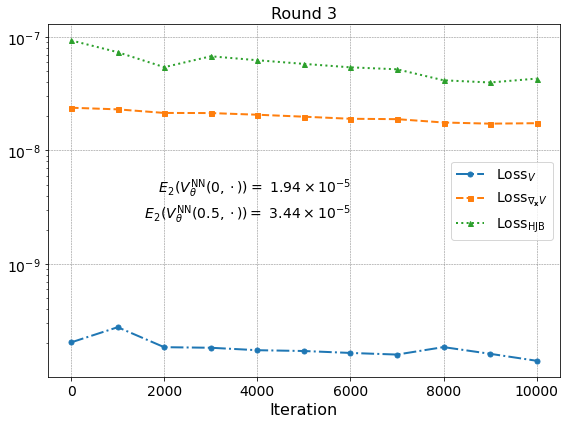

In [ ]:
# Round 3

# Iterations and loss values for each round
itr = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

Loss_v = [
    2.0352e-10, 2.7694e-10, 1.8460e-10, 1.8250e-10, 1.7364e-10, 1.7084e-10,
    1.6423e-10, 1.5894e-10, 1.8494e-10, 1.6140e-10, 1.4010e-10
]
Loss_v_x = [
    2.3809e-08, 2.3042e-08, 2.1427e-08, 2.1374e-08, 2.0663e-08, 1.9854e-08,
    1.9030e-08, 1.8888e-08, 1.7645e-08, 1.7237e-08, 1.7401e-08
]
Loss_hjb = [
    9.3350e-08, 7.3534e-08, 5.4224e-08, 6.7646e-08, 6.2431e-08, 5.7980e-08,
    5.4063e-08, 5.1948e-08, 4.1556e-08, 3.9749e-08, 4.3011e-08
]

err_r1_t0 = 1.94
err_r1_t05 = 3.44
err_r1_t1 = 0.000


plt.figure(figsize=(8, 6))  # Larger figure for clarity

# Plot losses with distinct markers and line styles
plt.plot(itr, Loss_v, '-o', label=r'$\mathrm{Loss}_V$', linestyle='-.', linewidth=2, markersize=5)
plt.plot(itr, Loss_v_x, '-s', label=r'$\mathrm{Loss}_{\nabla_{\mathbf{x}} V}$', linestyle='--', linewidth=2, markersize=5)
plt.plot(itr, Loss_hjb, '-^', label=r'$\mathrm{Loss}_{\mathrm{HJB}}$', linestyle=':', linewidth=2, markersize=5)

# Annotate relative errors
error_text = (
    r'$\quad\quad\quad\quadE_2(V^{\mathrm{NN}}_{\theta}(0, \cdot)) =\ ' + f'{err_r1_t0:.2f}' + r'\times 10^{-5}$' + '\n' +
    r'$\quad\quad\quadE_2(V^{\mathrm{NN}}_{\theta}(0.5, \cdot)) =\ ' + f'{err_r1_t05:.2f}' + r'\times 10^{-5}$'
)


plt.text(0.35, 0.5, error_text, fontsize=14, ha='center', va='center',
         transform=plt.gca().transAxes)

# Axis labels and title
plt.xlabel('Iteration', fontsize=16)
#plt.ylabel('Loss', fontsize=16)
plt.title('Round 3', fontsize=16)

# Log scale
plt.yscale("log")

# Tick label size
plt.tick_params(axis='both', which='major', labelsize=14)

# Legend and grid
plt.legend(fontsize=14)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Layout and save
plt.tight_layout()
plt.savefig('loss3.png', dpi=300)
plt.show()